In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Edhec_risk_kit as erk


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
def generate_brownian_motion(n_years = 10, n_scenarios = 1000, mu=0.07, sigma=0.15, steps_per_year = 12,  s_0=100.0):
    """
    Evolution of  Stock price using a geometric Brownian motion model
    
    """
    dt = 1/steps_per_year    # 1 denotes to 1 single year
    n_steps = int(n_years * steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = (mu * dt) + (sigma * np.sqrt(dt) * xi)
    rets = pd.DataFrame(rets)
    prices = s_0*(1+rets).cumprod()
    return prices

In [9]:
p = generate_brownian_motion(10, 3)

In [10]:
p.head()

,0,1,2
0,98.639861,107.074550,102.159632
1,103.012048,110.084421,108.737871
2,101.879055,112.200634,116.478160
3,99.851809,108.936683,123.168699
4,103.442176,106.866589,123.434551


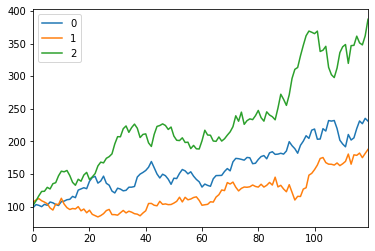

In [11]:
p.plot()

### generate same browninan motion prices but using better algo

In [21]:
def generate_brownian_motion(n_years = 10, n_scenarios = 1000, mu=0.07, sigma=0.15, steps_per_year = 12,  s_0=100.0):
    """
    Evolution of  Stock price using a geometric Brownian motion model
    
    """
    dt = 1/steps_per_year    # 1 denotes to 1 single year
    n_steps = int(n_years * steps_per_year)
    rets_plus_1 = np.random.normal(loc = (1+mu*dt), scale = (sigma*np.sqrt(dt)), size=(n_steps, n_scenarios))
    rets_plus_1[0] = 1  # to make sure that prices starting from a single point
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [16]:
%timeit generate_brownian_motion(10, 1000)

1.18 s ± 61.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
%timeit gbm(10, 1000)

609 ms ± 80.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


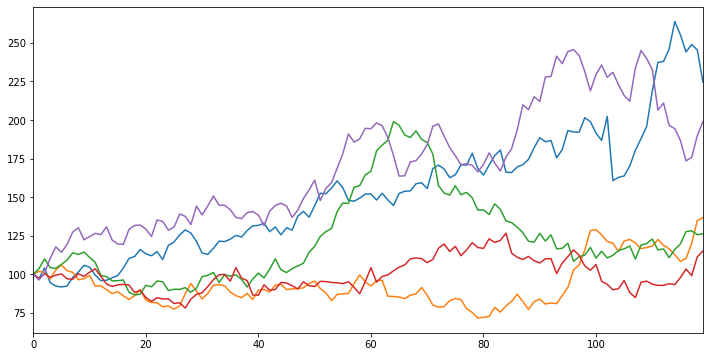

In [22]:
gbm(10, 5).plot(legend=False, figsize=(12,6))